In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
data = pd.read_excel("/content/tomato.xlsx")

In [ ]:
data.head()

,State Name,District Name,Market Name,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Tamil Nadu,Kancheepuram,Acharapakkam,4.0,785,815,800,2011-03-05
1,Tamil Nadu,Kancheepuram,Acharapakkam,3.7,750,850,825,2011-03-04
2,Tamil Nadu,Kancheepuram,Acharapakkam,4.0,775,850,800,2011-03-03
3,Tamil Nadu,Kancheepuram,Acharapakkam,4.5,700,750,725,2011-03-02
4,Tamil Nadu,Kancheepuram,Acharapakkam,4.0,700,775,750,2011-03-01


In [ ]:
data.tail()

,State Name,District Name,Market Name,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
496,Tamil Nadu,Coimbatore,Kianthukadavu,10.0,750,900,800,2013-02-11
497,Tamil Nadu,Coimbatore,Kianthukadavu,160.0,900,1000,950,2013-02-08
498,Tamil Nadu,Coimbatore,Kianthukadavu,203.0,850,1000,950,2013-02-07
499,Tamil Nadu,Coimbatore,Kianthukadavu,153.0,850,1000,900,2013-02-06
500,Tamil Nadu,Ramanathapuram,Ramanathapuram(phase 3),4.0,450,490,480,2010-03-16


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State Name                 501 non-null    object        
 1   District Name              501 non-null    object        
 2   Market Name                501 non-null    object        
 3   Arrivals (Tonnes)          501 non-null    float64       
 4   Min Price (Rs./Quintal)    501 non-null    int64         
 5   Max Price (Rs./Quintal)    501 non-null    int64         
 6   Modal Price (Rs./Quintal)  501 non-null    int64         
 7   Reported Date              501 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 31.4+ KB


In [ ]:
data = data.dropna()

data['Reported Date'] = pd.to_datetime(data['Reported Date']).astype(int)

In [ ]:
features = ['Arrivals (Tonnes)', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)', 'Reported Date']
target = 'Modal Price (Rs./Quintal)'

In [ ]:
train, test = train_test_split(data, test_size=0.4, random_state=0)

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

In [ ]:
model1 = GradientBoostingRegressor()
model1.fit(train_scaled, train[target])

GradientBoostingRegressor()

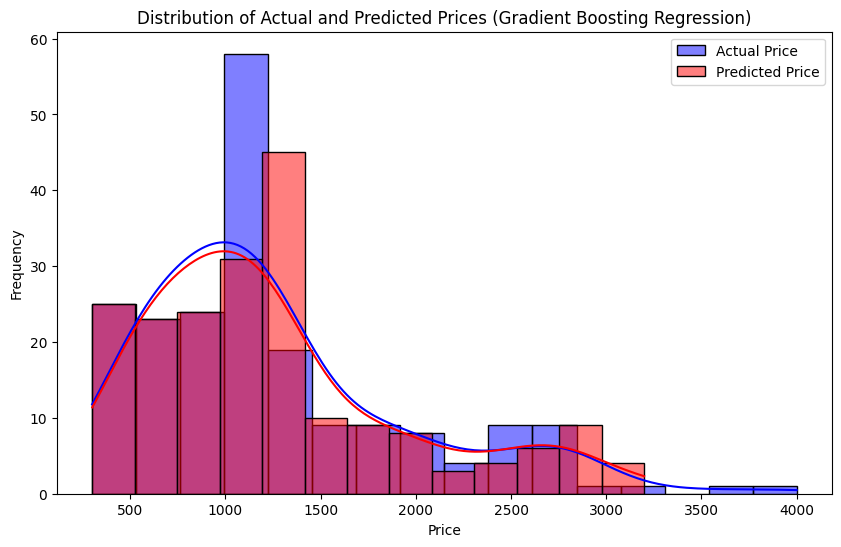

Mean Absolute Error: 9.110449385474569
     Actual Price  Predicted Price
90            700       700.043200
254           600       600.061796
284          1500      1499.958427
446          2400      2399.849554
339          1200      1199.977031
..            ...              ...
476           500       500.111994
92            600       600.061796
18           1200      1199.977031
198          1000      1000.008173
145          1000      1000.008173

[201 rows x 2 columns]


In [ ]:
predictions = model1.predict(test_scaled)

# Create a DataFrame for actual and predicted values
comparison_data = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})

# Plotting the distributional graph
plt.figure(figsize=(10, 6))
sns.histplot(comparison_data['Actual Price'], kde=True, color='blue', label='Actual Price')
sns.histplot(comparison_data['Predicted Price'], kde=True, color='red', label='Predicted Price')
plt.title('Distribution of Actual and Predicted Prices (Gradient Boosting Regression)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()
mae = mean_absolute_error(comparison_data['Actual Price'], comparison_data['Predicted Price'])
print("Mean Absolute Error:", mae)
predictions = model1.predict(test_scaled)
comparison_df = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})
print(comparison_df)


In [ ]:
mae = mean_absolute_error(comparison_data['Actual Price'], comparison_data['Predicted Price'])
print("Mean Absolute Error:", mae)

Mean Absolute Error: 9.110449385474569


Mean Absolute Error: 11.619402985074627
     Actual Price  Predicted Price
90            700            700.0
254           600            600.0
284          1500           1500.0
446          2400           2396.0
339          1200           1200.0
..            ...              ...
476           500            500.0
92            600            600.0
18           1200           1200.0
198          1000           1000.0
145          1000           1000.0

[201 rows x 2 columns]


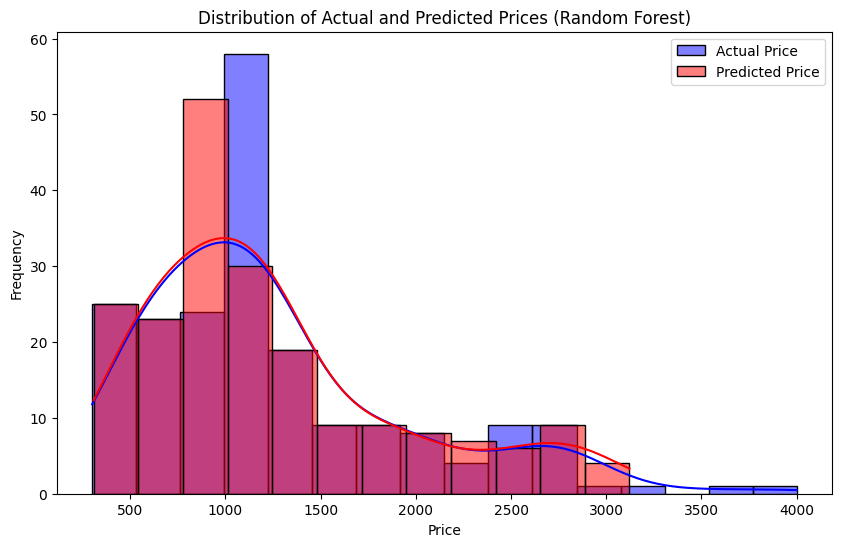

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(train_scaled, train[target])

# Make predictions
predictions = model2.predict(test_scaled)

# Create a DataFrame for actual and predicted values
comparison_data = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})

# Plotting the distributional graph
plt.figure(figsize=(10, 6))
sns.histplot(comparison_data['Actual Price'], kde=True, color='blue', label='Actual Price')
sns.histplot(comparison_data['Predicted Price'], kde=True, color='red', label='Predicted Price')
plt.title('Distribution of Actual and Predicted Prices (Random Forest)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
mae = mean_absolute_error(comparison_data['Actual Price'], comparison_data['Predicted Price'])
print("Mean Absolute Error:", mae)

predictions = model2.predict(test_scaled)
comparison_df = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})
print(comparison_df)

In [ ]:
best_model.fit(train_scaled, train[target])

# Make predictions
predictions = best_model.predict(test_scaled)

# Create a DataFrame for actual and predicted values
comparison_data = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})

# Plotting the distributional graph
plt.figure(figsize=(10, 6))
sns.histplot(comparison_data['Actual Price'], kde=True, color='blue', label='Actual Price')
sns.histplot(comparison_data['Predicted Price'], kde=True, color='red', label='Predicted Price')
plt.title('Distribution of Actual and Predicted Prices (GRNN)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
mae = mean_absolute_error(comparison_data['Actual Price'], comparison_data['Predicted Price'])
print("Mean Absolute Error:", mae)

predictions = model2.predict(test_scaled)
comparison_df = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})
print(comparison_df)

NameError: name 'best_model' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

# Define a pipeline with scaler and MLPRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLPRegressor(max_iter=1000, random_state=42))
])

# Define hyperparameters to tune
param_grid = {
    'regressor__hidden_layer_sizes': [(100,), (100, 90), (100, 50, 25),(100,75,50,25)],
    'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'regressor__activation': ['relu', 'tanh']
}


# Define Mean Squared Error as the scoring metric for GridSearchCV
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=5)
grid_search.fit(train[features], train[target])

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(test[features])

comparison_df = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})
print(comparison_df)
mse = mean_absolute_error(test[target], predictions)
print("Mean Squared Error:", mse)


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test.index, test[target], color='red', label='Actual Price')
plt.scatter(test.index, predictions, color='blue', label='Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
ax1 = sns.distplot(comparison_df['Actual Price'], hist=False, color="blue", label="Actual Price")
sns.distplot(comparison_df['Predicted Price'], hist=False, color="red", label="Predicted Price" , ax=ax1)
plt.title('Distribution Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
predictions_model1 = model1.predict(test_scaled)
predictions_model2 = model2.predict(test_scaled)
predictions_best_model = best_model.predict(test[features])

# Calculate mean squared error for each model
mse_model1 = mean_squared_error(test[target], predictions_model1)
mse_model2 = mean_squared_error(test[target], predictions_model2)
mse_best_model = mean_squared_error(test[target], predictions_best_model)

# Print MSE for each model
print("Mean Squared Error (Model 1 - Gradient Boosting):", mse_model1)
print("Mean Squared Error (Model 2 - Random Forest):", mse_model2)
print("Mean Squared Error (Best Model - MLPRegressor):", mse_best_model)

# Optionally, you can plot the actual vs predicted values for each model
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(test[target], predictions_model1, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 1 - Gradient Boosting')

plt.subplot(1, 3, 2)
plt.scatter(test[target], predictions_model2, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 2 - Random Forest')

plt.subplot(1, 3, 3)
plt.scatter(test[target], predictions_best_model, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Best Model - MLPRegressor')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
predictions_model1 = model1.predict(test_scaled)
predictions_model2 = model2.predict(test_scaled)
predictions_best_model = best_model.predict(test[features])

mae_model1 = mean_absolute_error(test[target], predictions_model1)
print("Mean Absolute Error (Gradient Boosting):", mae_model1)



mae_model2 = mean_absolute_error(test[target], predictions_model2)
print("Mean Absolute Error (Random Forest):", mae_model2)



mae_model3 = mean_absolute_error(test[target], predictions_best_model)
print("Mean Absolute Error (MLP Regressor):", mae_model3)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(test[target], predictions_model1, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 1 - Gradient Boosting')

plt.subplot(1, 3, 2)
plt.scatter(test[target], predictions_model2, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 2 - Random Forest')

plt.subplot(1, 3, 3)
plt.scatter(test[target], predictions_best_model, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Best Model - MLPRegressor')

plt.tight_layout()
plt.show()

In [ ]:

data['Reported Date'] = pd.to_datetime(data['Reported Date'])

daily_arrivals = data.groupby('Reported Date')['Arrivals (Tonnes)'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_arrivals.index, daily_arrivals.values, marker='o', linestyle='-')
plt.title('Arrivals Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrivals (Tonnes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

# Assuming you have the data in a DataFrame called df
# Convert 'Reported Date' to datetime format
data['Reported Date'] = pd.to_datetime(data['Reported Date'])

market_arrivals = data.groupby(['Reported Date', 'Market Name'])['Arrivals (Tonnes)'].sum().unstack()

# Plot the distribution for each market
plt.figure(figsize=(12, 6))
for market in market_arrivals.columns:
    plt.plot(market_arrivals.index, market_arrivals[market], marker='o', linestyle='-', label=market)

plt.title('Arrivals Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Total Arrivals (Tonnes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:


# Assuming you have the data in a DataFrame called df
# Convert 'Reported Date' to datetime format
data['Reported Date'] = pd.to_datetime(data['Reported Date'])

# Group by 'Market' and sum the arrivals for each market
market_grouped = data.groupby('Market Name')['Arrivals (Tonnes)'].sum()

# Plot the distribution for each market
for market, arrivals in market_grouped.items():
    plt.figure(figsize=(8, 6))
    plt.bar(data[data['Market Name'] == market]['Reported Date'], data[data['Market Name'] == market]['Arrivals (Tonnes)'])
    plt.title(f'Distribution of Arrivals for Market: {market}')
    plt.xlabel('Date')
    plt.ylabel('Total Arrivals (Tonnes)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
data['Reported Date'] = pd.to_datetime(data['Reported Date'])

# Extract month and year from the 'Date' column
data['Month'] = data['Reported Date'].dt.month
data['Year'] = data['Reported Date'].dt.year

# Group by month and calculate the average arrivals
monthly_arrivals = data.groupby(['Year', 'Month'])['Arrivals (Tonnes)'].mean().reset_index()

# Plot the average monthly arrivals
plt.figure(figsize=(10, 6))
plt.plot(monthly_arrivals['Month'], monthly_arrivals['Arrivals (Tonnes)'], marker='o')
plt.title('Average Monthly Arrivals in Important Market')
plt.xlabel('Month')
plt.ylabel('Average Arrivals (Tonnes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
monthly_arrivals = data.groupby(['Year', 'Month'])['Arrivals (Tonnes)'].mean().reset_index()

# Create a pivot table for easy plotting
pivot_table = monthly_arrivals.pivot("Month", "Year", "Arrivals (Tonnes)")

# Plot the average monthly arrivals as a bar plot
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=False)
plt.title('Average Monthly Arrivals in Important Market')
plt.xlabel('Month')
plt.ylabel('Average Arrivals (Tonnes)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
monthly_arrivals = data.groupby(['Year', 'Month'])['Arrivals (Tonnes)'].mean().reset_index()

# Plot the average monthly arrivals as a bar plot
plt.figure(figsize=(10, 6))
for year, group in monthly_arrivals.groupby('Year'):
    plt.bar(group['Month'], group['Arrivals (Tonnes)'], label=str(year))
plt.title('Average Monthly Arrivals in Important Market')
plt.xlabel('Month')
plt.ylabel('Average Arrivals (Tonnes)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [ ]:
monthly_arrivals = data.groupby(['Market Name', 'Year', 'Month'])['Arrivals (Tonnes)'].mean().reset_index()

# Get unique markets
markets = monthly_arrivals['Market Name'].unique()

# Plot average monthly arrivals for each market
for market in markets:
    # Filter data for the current market
    market_data = monthly_arrivals[monthly_arrivals['Market Name'] == market]

    # Plot the average monthly arrivals as a line plot
    plt.figure(figsize=(10, 6))
    for year, group in market_data.groupby('Year'):
        plt.plot(group['Month'], group['Arrivals (Tonnes)'], label=str(year))
    plt.title(f'Average Monthly Arrivals in {market}')
    plt.xlabel('Month')
    plt.ylabel('Average Arrivals (Tonnes)')
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is stored in a pandas DataFrame named 'df'
# If not, you can load the data into a DataFrame using pd.read_csv() or pd.read_excel()

# Grouping the data by 'Market Name' and counting the occurrences
market_distribution = data['Market Name'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
market_distribution.plot(kind='bar', color='skyblue')
plt.title('Market Distribution')
plt.xlabel('Market Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming the data is stored in a pandas DataFrame named 'df'
# If not, you can load the data into a DataFrame using pd.read_csv() or pd.read_excel()

# Grouping the data by 'Market Name' and counting the occurrences
market_distribution = data['Market Name'].value_counts()

print(market_distribution)


In [ ]:
predictions = best_model.predict(test[features])

comparison_df = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})
print(comparison_df)
comparison_data = pd.DataFrame({'Actual Price': test[target], 'Predicted Price': predictions})
mse = mean_absolute_error(test[target], predictions)
print("Mean Squared Error:", mse)
plt.figure(figsize=(10, 6))
sns.histplot(comparison_data['Actual Price'], kde=True, color='blue', label='Actual Price')
sns.histplot(comparison_data['Predicted Price'], kde=True, color='red', label='Predicted Price')
plt.title('Distribution of Actual and Predicted Prices (GRNN)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()